In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

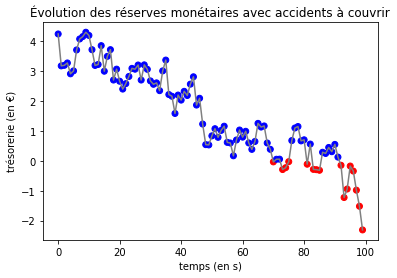

In [3]:
N = 100  # Durée totale (en s)
T = np.arange(N)  # Indices des temps
u0 = 5  # Quantité de départ (en €)
c = 1  # Débit d'argent rentrant (en €/s)
_lambda = 10  # Paramètre de la loi de Poisson pour les durées entre sinistres
ix = np.cumsum(np.append(0, np.random.poisson(_lambda, N)))  # Indices cumulés des événements de Poisson
x_max = int(N * _lambda + 5 * np.sqrt((N * _lambda)))  # Taille fixe du tableau des sinistres potentiels (jusqu'à +5*sigma)
rate_X = 0.1  # beta pour la loi de X
x = np.random.exponential(rate_X, x_max)  # Coûts des sinistres

s = lambda x, ix: np.vectorize(lambda i: np.sum(x[ix[i]: ix[i+1]]))  # Discrétisation des sinistres
X = s(x, ix)(T)  # Total à payer (en €/s)
u = u0 + c * np.arange(N) - np.cumsum(X)

plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
plt.scatter(T, u, c=np.array(['b', 'r'])[(u<0).astype(int)])
plt.plot(u, c='gray')
plt.show()